#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [20]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
# Note: Ensure the haarcascade_frontalface_default.xml file is in your directory
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = f"Total faces: {len(faces_rect)}" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.6  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image
    cv2.putText(img, "Face", (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

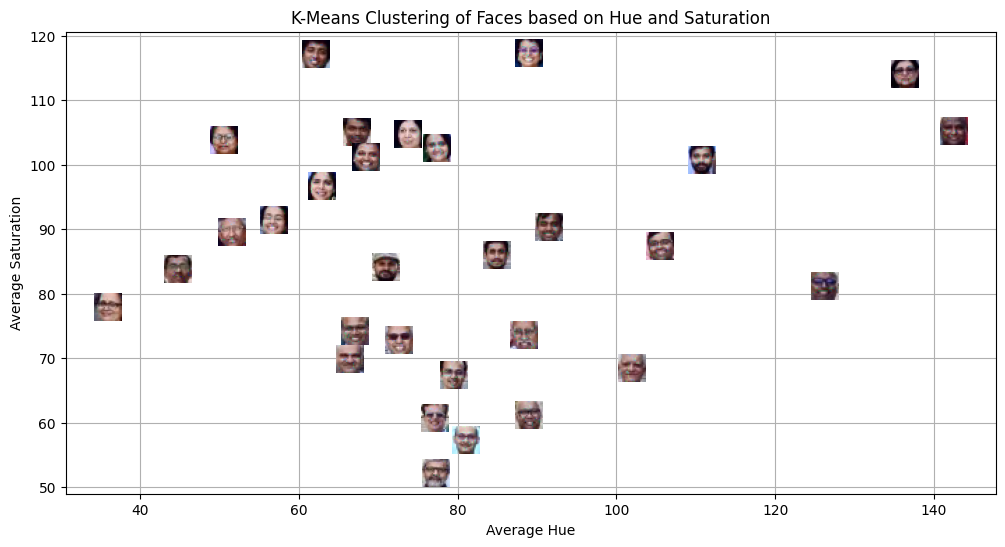

In [15]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
## call the img and convert it from BGR to HSV and store in img_hsv
img_hsv = cv2.cvtColor(cv2.imread('plaksha_Faculty.jpg'), cv2.COLOR_BGR2HSV) 

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put labels and title
plt.xlabel("Average Hue")
plt.ylabel("Average Saturation")
plt.title("K-Means Clustering of Faces based on Hue and Saturation")
plt.grid(True)
plt.show()

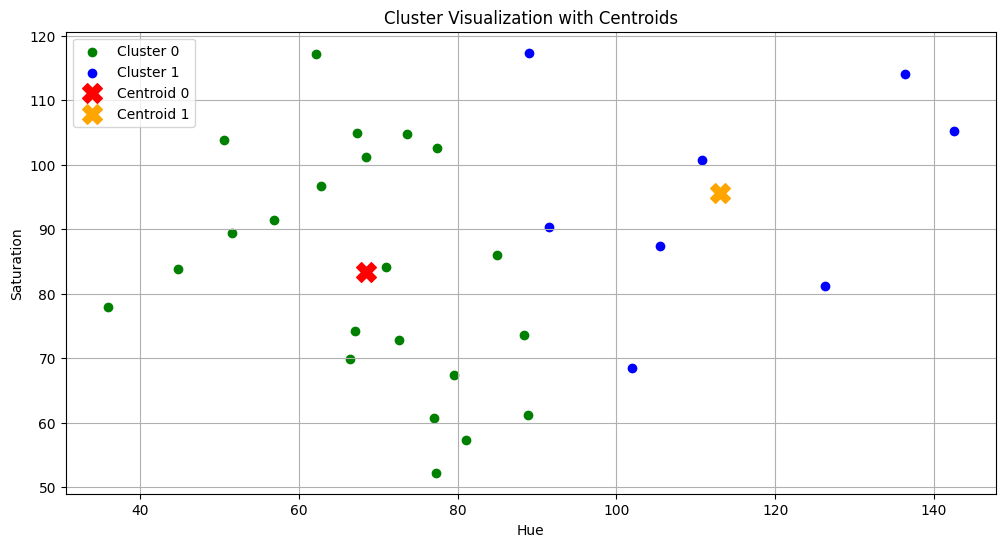

In [16]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='orange', marker='X', s=200, label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Cluster Visualization with Centroids")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')

# Detect face in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.1, 4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Template Face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

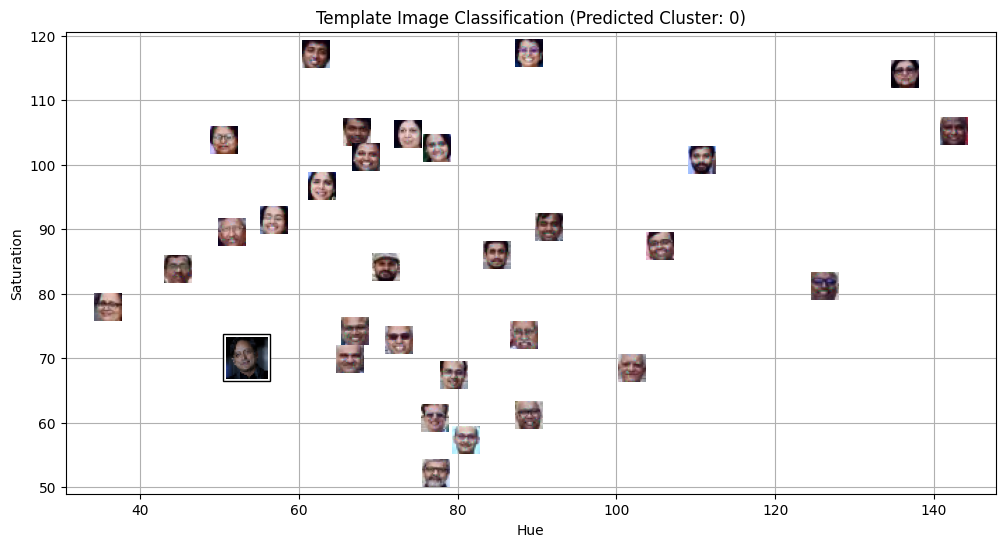

In [18]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(cv2.imread('Dr_Shashi_Tharoor.jpg'), cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image (assuming first detected face)
tx, ty, tw, th = template_faces[0]
template_face_roi = template_hsv[ty:ty+th, tx:tx+tw]
template_hue = np.mean(template_face_roi[:, :, 0])
template_saturation = np.mean(template_face_roi[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
im_template = OffsetImage(cv2.cvtColor(cv2.resize(cv2.imread('Dr_Shashi_Tharoor.jpg'), (30, 30)), cv2.COLOR_BGR2RGB))
ab_template = AnnotationBbox(im_template, (template_hue, template_saturation), frameon=True, pad=0.2)
ax.add_artist(ab_template)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title(f"Template Image Classification (Predicted Cluster: {template_label})")
plt.grid(True)
plt.show()

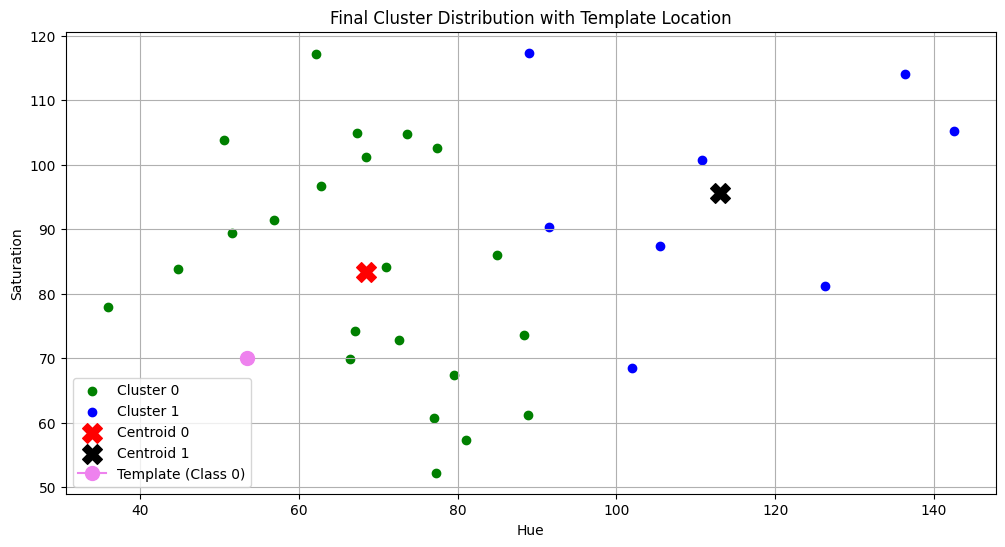

In [19]:
# Final visualization with centroids and template point
fig, ax = plt.subplots(figsize=(12, 6))

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
plt.scatter(centroid_0[0], centroid_0[1], marker='X', s=200, c='red', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='X', s=200, c='black', label='Centroid 1')

# Plot the template image location
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label=f'Template (Class {template_label})')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Final Cluster Distribution with Template Location")
plt.legend()
plt.grid(True)
plt.show()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

A1. Common Distance metrics used in distance-based classification algorithms include : 

The most common metrics are:

- Euclidean Distance: The straight-line distance between two points (standard geometry).

- Manhattan Distance (L1 Norm): The sum of absolute differences between coordinates (like a taxi driving on a city grid).

- Minkowski Distance: A generalization of both Euclidean and Manhattan distances.

- Hamming Distance: Used for categorical/string data; counts the number of positions where symbols differ.

A2. Real world applications of distance-based classification algorithms are : 

- Recommendation Systems: Finding users with "close" viewing habits (e.g., Netflix, Spotify).

- Anomaly Detection: Identifying credit card fraud by finding transactions that are "distant" from normal spending clusters.

- Bioinformatics: Classifying gene expression data to identify disease types.

- Image Recognition: Matching a face to a database of known faces (like in this lab).

A3. Different distance metrics - 

- Euclidean Distance: This is the standard straight-line distance between two points in space, calculated using the Pythagorean theorem.

- Manhattan Distance:  This metric calculates the distance between two points by summing the absolute differences of their coordinates, similar to navigating a city grid.

- Minkowski Distance: This is a generalized distance metric that includes both Euclidean and Manhattan distances as special cases depending on the parameter value used.

- Hamming Distance: This metric measures similarity by counting the number of positions at which the corresponding symbols in two strings of equal length are different.

A4. Cross-validation (like K-Fold) splits the data into multiple training and testing sets to ensure the model's accuracy is consistent and not just a fluke of one specific data split. It helps in:

- Detecting Overfitting: If the model performs well on one fold but poorly on another, it is likely overfitting.

- Hyperparameter Tuning: It helps find the best values for parameters (like 'K' in KNN) by averaging performance.

A5. This relates to the Bias-Variance Tradeoff.

- Low K (e.g., K=1):

    - High Variance: The model is very sensitive to noise. If you move a training point slightly, the decision boundary changes drastically.

    - Low Bias: It fits the training data perfectly (maybe too perfectly).

- High K (e.g., K=100):

    - Low Variance: The model is stable; changing one point doesn't affect the average much.

    - High Bias: The model is too simple and ignores local details, leading to underfitting.